In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import scipy.stats
import numpy as np

import diffxpy.api as de

# Generate some data:

In [2]:
from batchglm.api.models.glm_nb import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=0, num_conditions=4)
sim.generate_params()
sim.generate_data()

# Run differential expression test:

The pairwise test allows to perform comparisons between each group of samples to the remaining samples.

It needs a parameter `grouping` which assigns a group to each sample.
This `grouping` can either be a vector of length `num_observations` or a string specifying a column in the sample description.
Since we simulated `grouping` with `num_batches=4` different groups, the pairwise test will perform 4 different tests.

The parameter `test` specifies which kind of statistical test will be performed for each pair of groups.
Possible arguments are all `two_sample` tests (e.g. 'wald', 't-test', 'wilcoxon', ...).

In [3]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

test = de.test.versus_rest(
    data=sim.X,
    grouping="condition",
    test="wald",
    noise_model="nb",
    sample_description=sim.sample_description,
    batch_size=100,
    training_strategy="DEFAULT",
    dtype="float64"
)

INFO:diffxpy.testing.base:Fitting model...


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


INFO:diffxpy.testing.base:Fitting model...


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


INFO:diffxpy.testing.base:Fitting model...


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


INFO:diffxpy.testing.base:Fitting model...


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


# Obtaining the results

## Global results across all tests

The p-/q-values can be obtained by calling `test.pval` / `test.qval`:

In [4]:
np.set_printoptions(precision=3)
print("shape of p-values: %s" % str(test.pval.shape))

shape of p-values: (1, 4, 100)


p-values of first gene:

In [5]:
test.pval[:,:,0]

array([[0.000e+00, 7.594e-09, 0.000e+00, 0.000e+00]])

test.summary() returns a pandas DataFrame with a quick overview of the test results:

In [6]:
test.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean
0,0,0.000000e+00,0.000000e+00,0.771994,698.0305
1,1,0.000000e+00,0.000000e+00,1.674568,683.0915
2,2,0.000000e+00,0.000000e+00,0.676585,461.5385
3,3,0.000000e+00,0.000000e+00,0.842508,806.2660
4,4,0.000000e+00,0.000000e+00,0.559790,696.9920
5,5,0.000000e+00,0.000000e+00,0.824943,600.2370
6,6,0.000000e+00,0.000000e+00,0.457554,724.6510
7,7,1.020095e-08,1.924707e-08,0.338817,613.7935
8,8,0.000000e+00,0.000000e+00,1.420283,535.6945
9,9,0.000000e+00,0.000000e+00,1.086588,535.1960


- `gene`: gene name / identifier
- `pval`: minimal p-value of the tests
- `qval`: minimal multiple testing - corrected p-value of the tests
- `log2fc`: maximal $log_2$ fold change of the tests

`test.plot_volcano()` creates a volcano plot of p-values vs. fold-change:

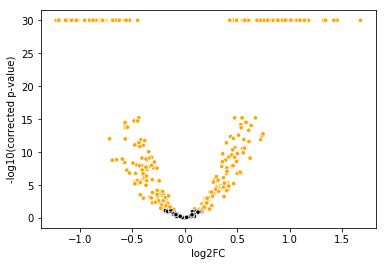

In [7]:
test.plot_volcano()
plt.show()

`test.plot_diagnostics()` is a shortcut to directly show all diagnostics plots.

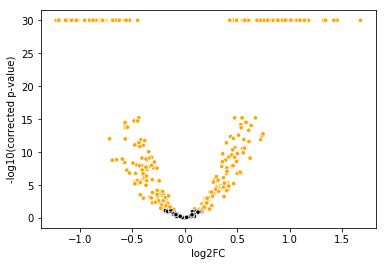

In [8]:
test.plot_diagnostics()

## Results specific for one test

One may be specifically interested in a the comparison of a specific pair of groups. Multiple methods presented above are adapated for this scenario and are simply called test.*_group

The group identifiers are:

In [10]:
print(np.unique(sim.sample_description['batch'].values))

['0' '1' '2' '3']


The results for the comparison of groups '2' versus the rest are:

In [11]:
test.log2_fold_change().shape

(1, 4, 100)

In [12]:
test.pval_group(group='2')[:10]

array([0.000e+00, 0.000e+00, 5.654e-04, 4.496e-09, 0.000e+00, 0.000e+00,
       3.099e-02, 2.102e-02, 2.743e-10, 0.000e+00])

In [13]:
test.summary_group(group='2').iloc[:10,:]

,gene,pval,qval,log2fc,mean
0,0,0.000000e+00,4.940656e-324,-0.642786,698.0305
1,1,0.000000e+00,4.940656e-324,1.674568,683.0915
2,2,5.653599e-04,7.990953e-04,0.227427,461.5385
3,3,4.496093e-09,8.815868e-09,-0.459130,806.2660
4,4,0.000000e+00,4.940656e-324,0.436876,696.9920
5,5,0.000000e+00,4.940656e-324,-1.195172,600.2370
6,6,3.098611e-02,3.885406e-02,0.092840,724.6510
7,7,2.101572e-02,2.668662e-02,-0.169916,613.7935
8,8,2.743257e-10,5.931366e-10,-0.317603,535.6945
9,9,0.000000e+00,4.940656e-324,-0.848468,535.1960
